# Importing Basic Libraries

In [14]:
# Importing Basic Libraries
import warnings as w
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
w.filterwarnings('ignore')


In [15]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# Reading the data

In [16]:
# Reading the data
df = pd.read_csv(r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\USA_Housing.csv")
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.459,5.683,7.009,4.090,23086.801,1059033.558,"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101"
1,79248.642,6.003,6.731,3.090,40173.072,1505890.915,"188 Johnson Views Suite 079\nLake Kathleen, CA 48958"
2,61287.067,5.866,8.513,5.130,36882.159,1058987.988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489"
3,63345.240,7.188,5.587,3.260,34310.243,1260616.807,USS Barnett\nFPO AP 44820
4,59982.197,5.041,7.839,4.230,26354.109,630943.489,USNS Raymond\nFPO AE 09386


# Description of the data

In [17]:
# Exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [18]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,68583.109,5.977,6.988,3.981,36163.516,1232072.654
std,10657.991,0.991,1.006,1.234,9925.650,353117.627
min,17796.631,2.644,3.236,2.000,172.611,15938.658
25%,61480.562,5.322,6.299,3.140,29403.929,997577.135
50%,68804.286,5.970,7.003,4.050,36199.407,1232669.378
75%,75783.339,6.651,7.666,4.490,42861.291,1471210.204
max,107701.748,9.519,10.760,6.500,69621.713,2469065.594


# Checking Null Values

In [19]:
# Checking for null values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [20]:
# Dropping the Address column
df.drop("Address", axis=1, inplace=True)


<Axes: xlabel='Price'>

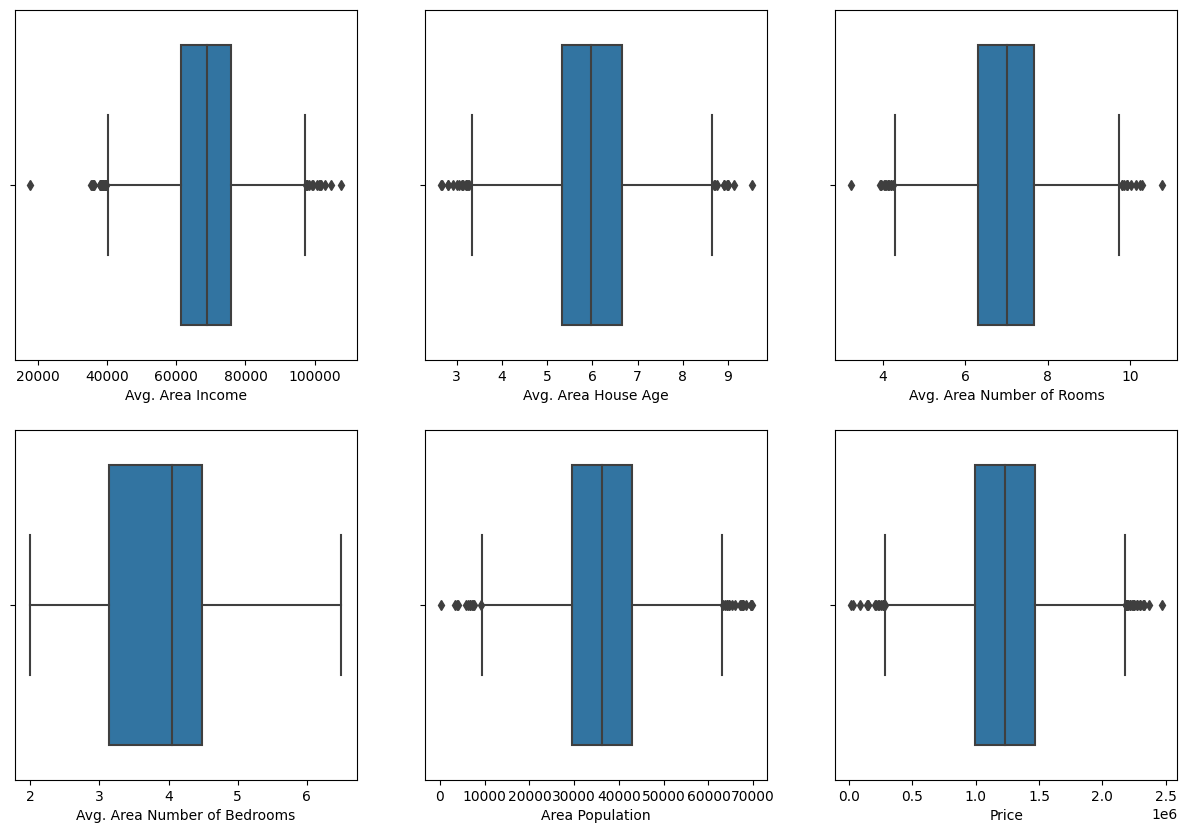

In [21]:
# Plotting boxplot to check for outliers using subplots

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(x="Avg. Area Income",data=df, ax=ax[0, 0])    
sns.boxplot(x="Avg. Area House Age",data=df ,ax=ax[0, 1])
sns.boxplot(x="Avg. Area Number of Rooms",data=df ,ax=ax[0, 2])
sns.boxplot(x="Avg. Area Number of Bedrooms",data=df ,ax=ax[1, 0])
sns.boxplot(x="Area Population", data=df , ax=ax[1, 1]) 
sns.boxplot(x="Price", data=df , ax=ax[1, 2])

In [22]:
"""# Removing outliers using Inter Quartile Range of every column
for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    df = df[(df[i] > low) & (df[i] < high)]"""

# Removing outliers using zscore
from scipy.stats import zscore

z = np.abs(zscore(df))
df = df[(z < 3).all(axis=1)]


<Axes: xlabel='Price'>

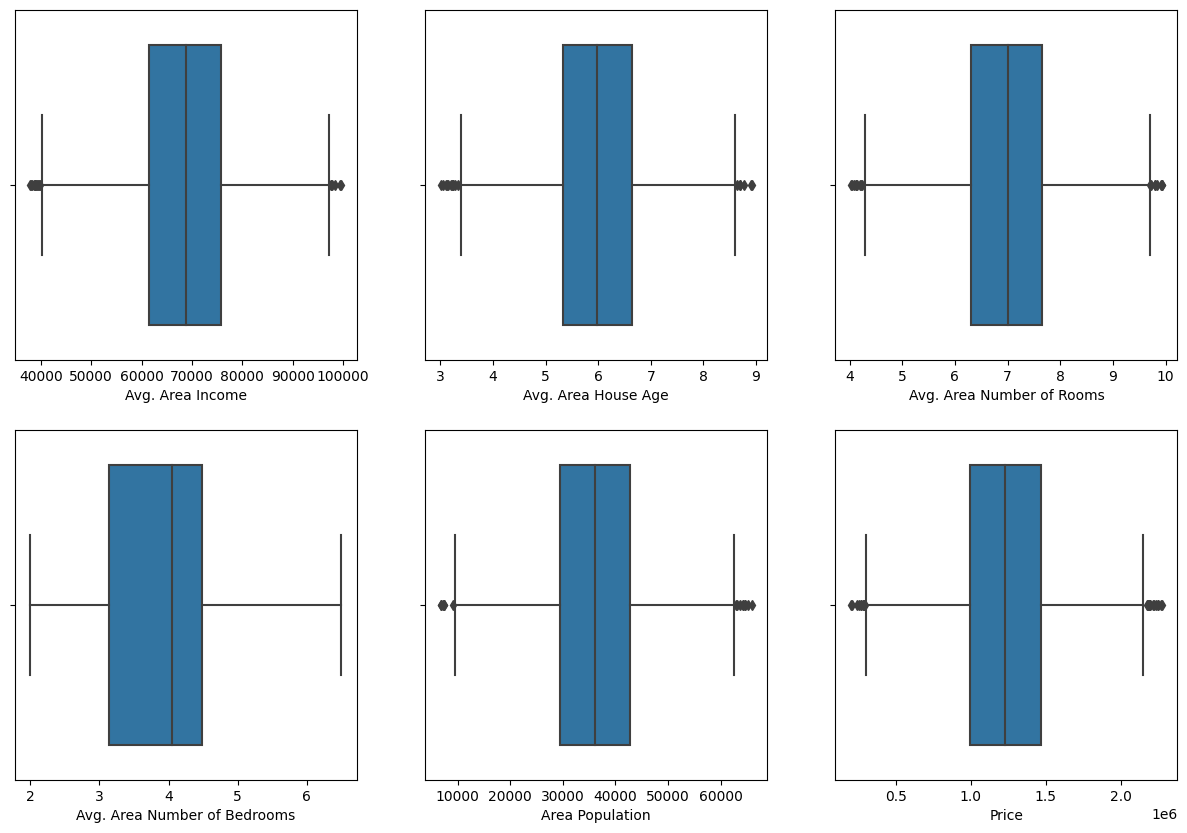

In [23]:
# Plotting boxplot to check for outliers using subplots

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(x="Avg. Area Income",data=df, ax=ax[0, 0])    
sns.boxplot(x="Avg. Area House Age",data=df ,ax=ax[0, 1])
sns.boxplot(x="Avg. Area Number of Rooms",data=df ,ax=ax[0, 2])
sns.boxplot(x="Avg. Area Number of Bedrooms",data=df ,ax=ax[1, 0])
sns.boxplot(x="Area Population", data=df , ax=ax[1, 1]) 
sns.boxplot(x="Price", data=df , ax=ax[1, 2])

In [25]:
# Changing the data type of Avg. Area Number of Rooms and Avg. Area Number of Bedrooms
df[["Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms"]] = df[
    ["Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms"]
].astype("int64")


In [26]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.459,5.683,7,4,23086.801,1059033.558
1,79248.642,6.003,6,3,40173.072,1505890.915
2,61287.067,5.866,8,5,36882.159,1058987.988
3,63345.240,7.188,5,3,34310.243,1260616.807
4,59982.197,5.041,7,4,26354.109,630943.489


<Axes: xlabel='Price', ylabel='Density'>

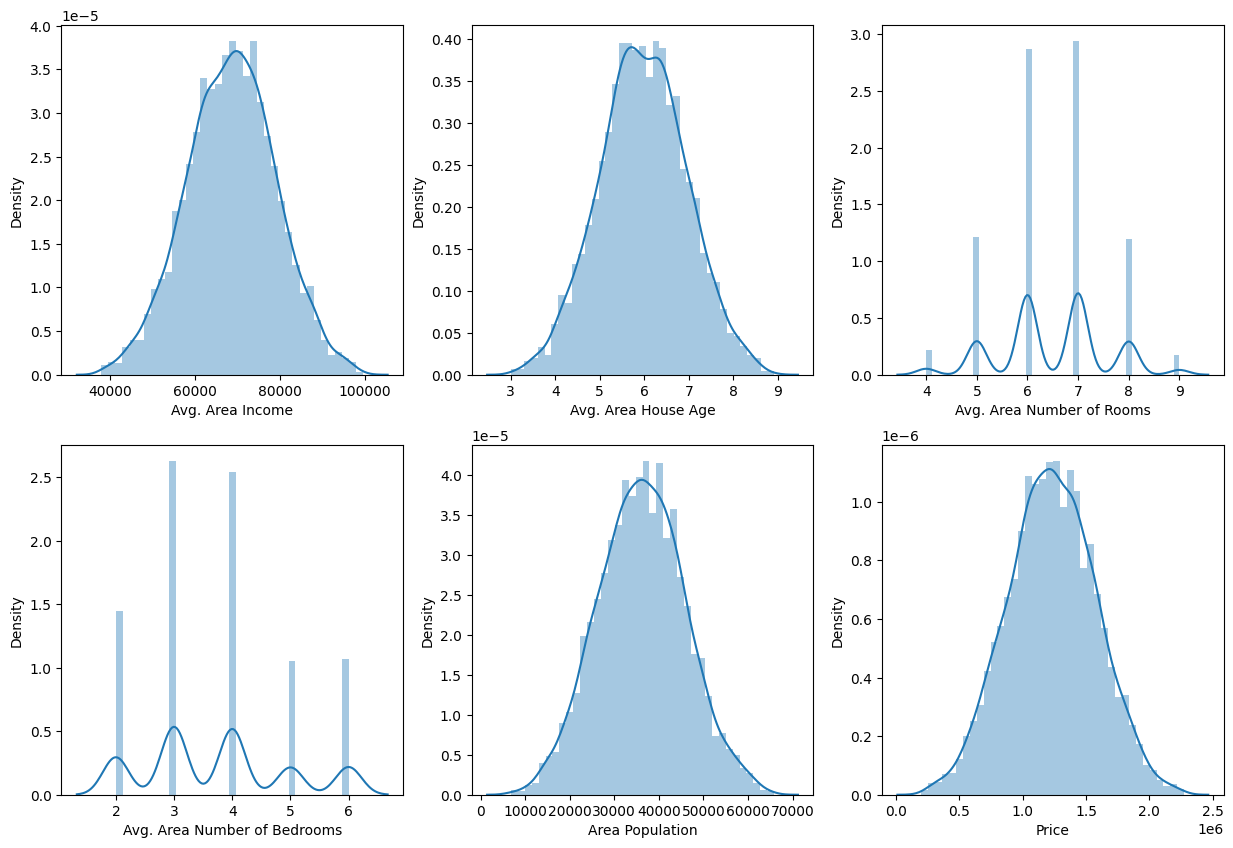

In [27]:
# Plotting the data distribution using subplots

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.distplot(df["Avg. Area Income"], ax=ax[0, 0])
sns.distplot(df["Avg. Area House Age"], ax=ax[0, 1])
sns.distplot(df["Avg. Area Number of Rooms"], ax=ax[0, 2])
sns.distplot(df["Avg. Area Number of Bedrooms"], ax=ax[1, 0])
sns.distplot(df["Area Population"], ax=ax[1, 1])
sns.distplot(df["Price"], ax=ax[1, 2])

<Axes: >

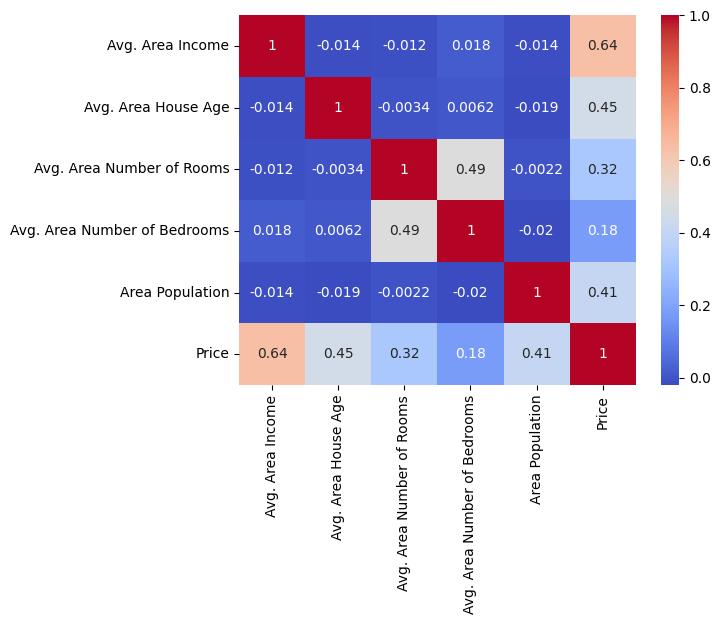

In [28]:
# Printing the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# Modeling

In [29]:
# Splitting the data into X and y
X = df.drop("Price", axis=1)
y = df[["Price"]]


In [30]:
# Getting feature list who have unique values more than 10

feature_list = [feature for feature in X.columns if X[feature].nunique() > 10]
feature_list


['Avg. Area Income', 'Avg. Area House Age', 'Area Population']

In [31]:
# Splitting the data into train and test
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scaling the data

# sc = StandardScaler()
# SCX_train = X_train.copy(deep=True)
# SCX_test = X_test.copy(deep=True)
# SCX_train[feature_list] = sc.fit_transform(SCX_train[feature_list])
# SCX_test[feature_list] = sc.transform(SCX_test[feature_list])


In [32]:
# Importing the Regression Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Importing the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Making a list of tuples model name and models
model_list = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor(n_estimators=200)),
    ("KNN", KNeighborsRegressor()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(verbosity=0)),
    ("CatBoost", CatBoostRegressor(verbose=0)),
    ("Lasso", Lasso()),
    ("Ridge", Ridge()),
    ("ElasticNet", ElasticNet()),
]


## Model Building on Original Data

In [33]:
# Making a dataframe to store metrics and comparing the models
df_metrics = {}

# Fitting the models and storing the metrics
for name, model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df_metrics[name] = {
        'MSE',  mean_squared_error(y_test, y_pred),
        'MAE', mean_absolute_error(y_test, y_pred),
        'R2 Score', r2_score(y_test, y_pred),
        'RMSE', np.sqrt(mean_squared_error(y_test, y_pred))
        }

# Comparing the models
df_metrics = pd.DataFrame(df_metrics)
df_metrics.sort_values(by="R2 Score", ascending=False)


,R2 Score,MSE,RMSE,MAE
Model,,,,
Ridge,0.901,11995849326.211,109525.565,87840.023
Lasso,0.901,11996049310.210,109526.478,87839.707
Linear Regression,0.901,11996057237.520,109526.514,87839.730
CatBoost,0.889,13520576982.929,116278.016,93435.054
Random Forest,0.868,16055044596.902,126708.502,101755.559
ElasticNet,0.866,16206515291.229,127304.813,102887.482
XGBoost,0.861,16823951112.820,129707.174,103957.814
Decision Tree,0.762,28886139641.718,169959.229,135359.022
KNN,0.478,63277240210.807,251549.677,202431.910


In [30]:
# Creating GridSearchCV for Decision Tree Regressor

from sklearn.model_selection import GridSearchCV

# Creating instance of Decision Tree Regressor

dt = DecisionTreeRegressor()

# Creating a dictionary of parameters

param_grid = {
    "criterion": ["mse", "friedman_mse", "mae", "poisson"],
    "max_depth": [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Creating GridSearchCV instance

grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fitting the model

grid_search.fit(X_train, y_train)

# Printing the best parameters

params = grid_search.best_params_


Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


In [32]:
params

{'criterion': 'poisson',
 'max_depth': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

R2 Score: 0.7702546637718339
RMSE: 156388.23042430767
MAE: 124599.61007936153
MSE: 24457278615.24635


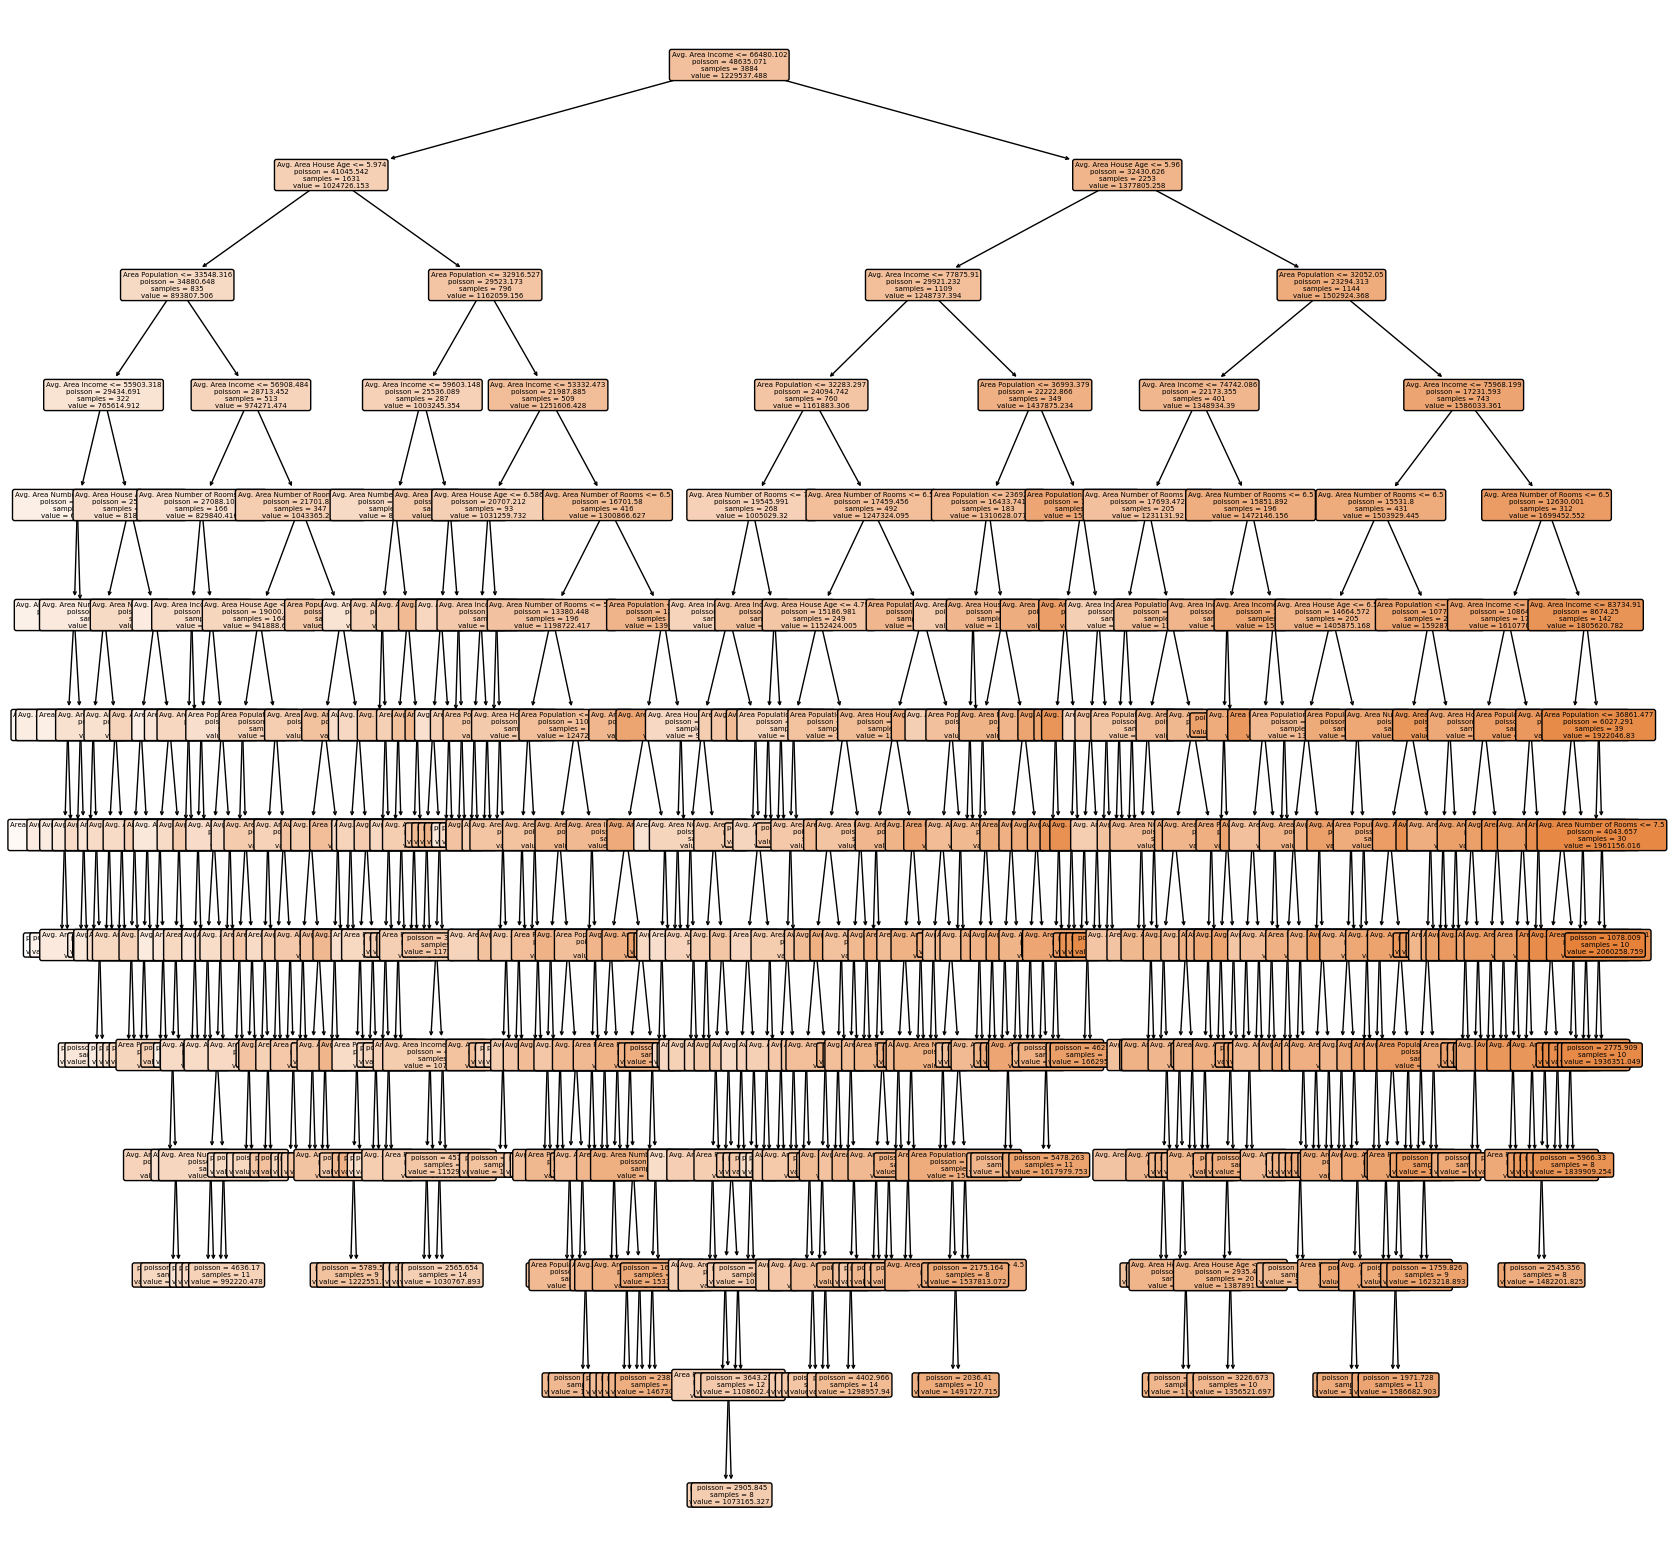

In [33]:
# Creating model with Decision Tree

dt = DecisionTreeRegressor(**params,random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Checking the metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

## Plotting Tree for the model

from sklearn.tree import plot_tree

# Plottting only the first tree

plt.figure(figsize=(20, 20))
plot_tree(dt, feature_names=X_train.columns, filled=True, rounded=True,fontsize=5)
plt.show()